# UCLA SETI course<br>Jean-Luc Margot<br>Lecture 7<br>Shift and Add

You have learned how to compute dynamic spectra to characterize the time-frequency behavior of signals.  In this notebook, you will learn how to compute the total power associated with an example signal by the "shift and add" method.  This process maximizes our ability to detect faint signals.

# Total power in signal at constant frequency
We first consider a signal whose receive frequency is constant (i.e., constant line-of-sight velocity between transmitter and receiver).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's consider an example time-frequency array with 4 spectra of length 8 each.  Rows represent consecutive spectra.  Columns represent individual frequencies.

In [2]:
df = np.array([[0,1,0,1,0,3,0,1],[1,0,1,0,1,3,1,0],[0,0,1,1,0,3,0,1],[1,1,0,0,1,3,1,0]])
print(df)

[[0 1 0 1 0 3 0 1]
 [1 0 1 0 1 3 1 0]
 [0 0 1 1 0 3 0 1]
 [1 1 0 0 1 3 1 0]]


The signal of interest in this example array may not be reliably detectable in individual spectra.  However, the signal stands out if we compute the total power received at each frequency by summing along the vertical dimension. 

In [3]:
tf=np.sum(df,axis=0)
print(tf)

[ 2  2  2  2  2 12  2  2]


Typically our spectra have on the order of a million points each.  We can identify the location of the maximum with np.argmax().

In [4]:
print("Maximum value %.0f is located at index %d."%(tf[np.argmax(tf)],np.argmax(tf)))

Maximum value 12 is located at index 5.


## Total power in signal with known frequency drift rate
We now consider another example array with a signal whose receive frequency drifts linearly as a function of time.

In [5]:
dv = np.array([[0,1,0,1,0,3,0,1],[1,0,1,0,3,1,1,0],[0,0,1,3,1,0,0,1],[1,1,3,0,0,1,1,0]])
print(dv)

[[0 1 0 1 0 3 0 1]
 [1 0 1 0 3 1 1 0]
 [0 0 1 3 1 0 0 1]
 [1 1 3 0 0 1 1 0]]


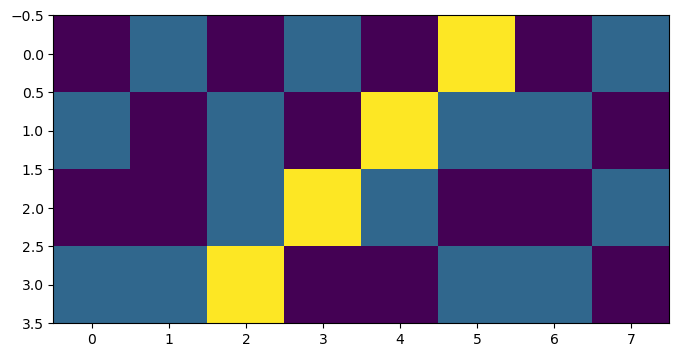

In [6]:
plt.figure(figsize=(8, 4))
plt.imshow(dv)
plt.show()

In this case, summing elements of the array along the vertical dimension does not yield a convincing detection because the signal power is smeared over multiple frequency resolution cells.

In [7]:
tv=np.sum(dv,axis=0)
print(tv)

[2 2 5 4 4 5 2 2]


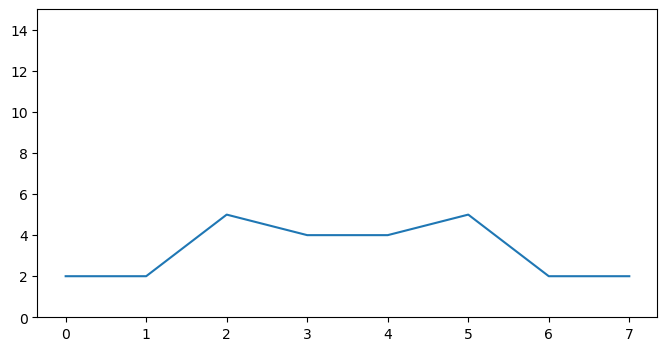

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(tv)
plt.ylim(0,15)
plt.show()

If the rate of change of the signal frequency is detectable or known from a priori information, we can <b>shift and add</b> elements of the array to improve the detection.  First, we <b>shift</b> each row by the amount required to maximize detection with numpy.roll().

In [9]:
ds=np.zeros([4,8])
for i in range(4):
    ds[i,:] = np.roll(dv[i], i)
print(ds)

[[0. 1. 0. 1. 0. 3. 0. 1.]
 [0. 1. 0. 1. 0. 3. 1. 1.]
 [0. 1. 0. 0. 1. 3. 1. 0.]
 [1. 1. 0. 1. 1. 3. 0. 0.]]


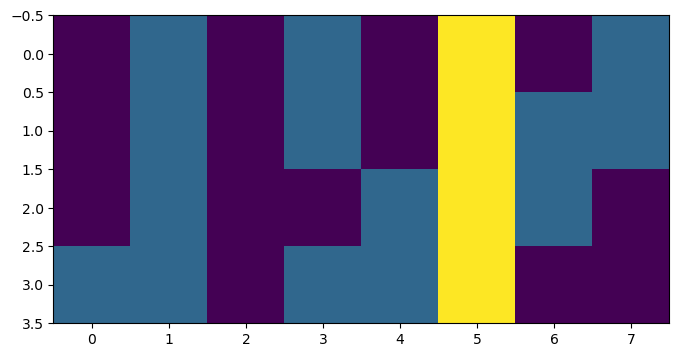

In [10]:
plt.figure(figsize=(8, 4))
plt.imshow(ds)
plt.show()

Second, we <b>add</b> the powers along the vertical dimension.

In [11]:
ts=np.sum(ds,axis=0)
print(ts)

[ 1.  4.  0.  3.  2. 12.  2.  2.]


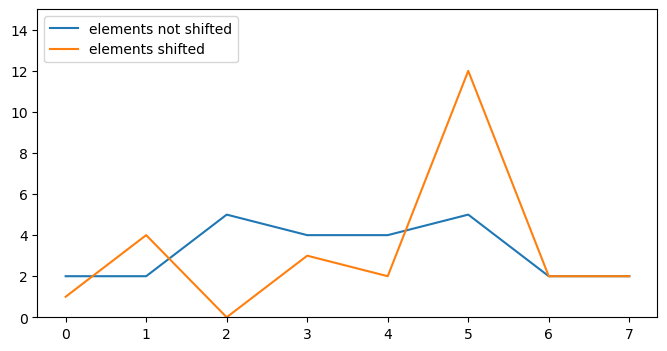

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(tv, label='elements not shifted')
plt.plot(ts, label='elements shifted')
plt.legend(loc='upper left')
plt.ylim(0,15)
plt.show()

# Voyager 1
In this exercise, you will detect the signal from [Voyager 1](https://en.wikipedia.org/wiki/Voyager_1).  This venerable spacecraft launched in 1977 and provided the first detailed reconnaissance of the Jupiter and Saturn systems.  It is currently our most remote ambassador at a distance of 166 astronomical units (23 light hours) from the Sun.  The monochromatic signal emitted by the 22 W transmitter onboard the spacecraft is still detectable with large radio telescopes on Earth.

The precomputed power spectra are available on seti2.epss.ucla.edu in the folder [../shared/Voyager1/fftb](../shared/Voyager1/fftb).  
* The data include 64 channels (c000 to c063) of 2.9296875 MHz each in each one of 2 circular polarizations (p0 and p1).
* Each fftb file contains exactly 252 consecutive power spectra.
* The fft length of each spectrum is 3145728 (3 * 2^20).  
* Each <b>power</b> is stored as a 4-byte floating point value.
* Each file size is equal to 4 bytes * 3145728 * 252 = 3170893824 bytes (~3 GB).

Please be careful not to overwhelm the computer memory when loading files - load no more than one channel's worth of data at a time and work in teams.  Select "File -> Close and Halt" when done.

The Doppler shift at the beginning and end of the data recording were<br>
09-JAN-2016 20:45:22.0000 UTC  -105734.66 Hz<br>
09-JAN-2016 20:49:54.0000 UTC  -105728.00 Hz<br>
corresponding to a change in frequency over the observation interval of +6.66 Hz.

Roadmap:
1. Compute the frequency resolution of the spectra.
2. Compute the time interval between consecutive samples and between consecutive spectra.
3. Compute the duration of the observation.
4. Compute the expected frequency drift rate of the Voyager 1 signal in Hz/s.
5. Compute the expected frequency drift rate of the Voyager 1 signal in resolution cells per row.
6. Figure out a strategy for shifting and adding consecutive spectra.
7. Use np.fromfile() with the appropriate data type to load **one** p0 file and **one** p1 file. 
8. Use reshape() to shape the arrays appropriately.
9. Use np.roll() to shift individual rows by the appropriate amount. 
10. Use np.sum() to integrate the power over the duration of the observation.
11. Use np.sort() and/or np.argmax() to identify the locations of the power maxima.
12. Display time-frequency diagrams of subsets (e.g., 400x252) of the **original, unshifted** array centered around locations associated with power maxima. 
13. Display similar subsets with data from the opposite circular polarization.
14. The signal from Voyager 1 should drift in frequency by the appopriate amount and should appear in one polarization but not the other.
15. Hints: The frequency axis is likely inverted (i.e., frequency increases to the left).  Focus on channels numbered 000-019.


## My solutions for questions 1 - 5

In [2]:

freq = 2.9296875e6

time_interval_per_row = 1/freq
print("time_interval in seconds:", time_interval_per_row)

fft_len = 3145728
resolution = freq / fft_len
print("resolution in Hz:", resolution)
total_num_bytes = 4 * 3145728 * 252
time = 252 * time_interval_per_row
print("time in seconds:", time)

total_observation = 3145728 * 252


drift = 6.66

drift_rate = drift / time

print("drift_rate in Hz:", drift_rate)

drift_rate_per_cell = drift_rate/(freq)
print("drift_rate per cell:", drift_rate_per_cell)

divisible = 1 / drift_rate_per_cell
print("divisible:", divisible)

time_interval in seconds: 3.413333333333333e-07
resolution in Hz: 0.9313225746154785
time in seconds: 8.6016e-05
drift_rate in Hz: 77427.45535714286
drift_rate_per_row in hz per cell: 0.026428571428571426
divisible: 37.83783783783784


## Total power in signal of unknown frequency drift rate
When the frequency drift rate is not directly observable or calculable, the detection of signals is more complicated.  We can consider a finite set of negative and positive frequency drift rates, shift and add array elements accordingly, and record the drift rate that yields the maximum power at each frequency.  We implemented this strategy with a tree algorithm.  

In [6]:
data = np.fromfile('/data/seti/epss179S25/nathan16/shared/Voyager1/fftb/c006p1.fftb', dtype=np.float32)


In [20]:
print("data:",data)
print("data shape:", data.shape)
print(data[0:10])
data = data.reshape(252,3145728)
print("data shape:", data.shape)

data: [-0.49059033 -0.61275536 -0.35283962 ... -0.2583584  -0.61361253
  0.01500649]
data shape: (792723456,)
[-0.49059033 -0.61275536 -0.35283962 -0.5809657  -0.5373833  -0.58945304
 -0.62895787 -0.28096047 -0.2448482  -0.40065822]


## Batch multiply the dataset, using probability to generate a smooth average for each row drift...

GPT really captured my idea: 

	•	Instead of shifting by 0.02836 * row_index per row,
	•	You shift by:
$$\text{shift}_{i,j} = \left\lfloor \frac{i \cdot \text{drift\_per\_row} \cdot \text{div} + j}{\text{div}} \right\rfloor $$
	•	Where:
	•	i = row index (0 to 251)
	•	j = copy index (0 to div–1)
	•	This spreads the fractional roll over div integer shifts and allows you to average them to simulate fractional alignment.

Put it simple, it's just a way to multiply the fractions into integers.


In [3]:
# constants
freq = 2.9296875e6

time_interval_per_row = 1/freq
print("time_interval in seconds:", time_interval_per_row)

fft_len = 3145728
resolution = freq / fft_len
print("resolution in Hz:", resolution)
total_num_bytes = 4 * 3145728 * 252
time = 252 * time_interval_per_row
print("time in seconds:", time)

total_observation = 3145728 * 252


drift = 6.66

drift_rate = drift / time

print("drift_rate in Hz:", drift_rate)

drift_per_row = drift_rate/(freq)
print("drift_rate_per_row in hz per cell:", drift_per_row)


div = 1 / (drift_per_row/resolution)
print("divisible:", div)

n_rows = 252



time_interval in seconds: 3.413333333333333e-07
resolution in Hz: 0.9313225746154785
time in seconds: 8.6016e-05
drift_rate in Hz: 77427.45535714286
drift_rate_per_row in hz per cell: 0.026428571428571426
divisible: 35.239232553018105


In [37]:
# deprecated

# # Compute divisor (number of sub-bins per bin)
# drift_per_row = drift_per_row
# # Compute divisor (how many fractional steps per bin)
# div = int(round(1 / drift_per_row))  # ~35
# print(f"[INFO] Drift per row: {drift_per_row:.5f} bins")
# print(f"[INFO] Using div = {div} → 1 bin per {div} rows (rounded)")

# # Total number of integer-shifted rounds (copies)
# total_rounds = div
# print(f"[INFO] Performing {total_rounds} integer-shifted roll rounds...")

[INFO] Drift per row: 0.02643 bins
[INFO] Using div = 38 → 1 bin per 38 rows (rounded)
[INFO] Performing 38 integer-shifted roll rounds...


In [8]:
data = np.fromfile('/data/seti/epss179S25/nathan16/shared/Voyager1/fftb/c006p1.fftb', dtype=np.float32)
# === Output memmap file ===
output_filename = "c006p1_aligned.bin"
aligned = np.memmap(output_filename, dtype=np.float32, mode='w+', shape=(n_rows, fft_len))

# === Row-wise processing ===
print("[INFO] Starting row-wise alignment...")
for i in range(n_rows):
    row = data[i]
    m = i % div
    w_unshifted = div - m
    w_shifted = m

    if w_shifted == 0:
        result = row.copy()
        shift_amount = 0
    else:
        shifted = np.roll(row, -1)
        result = (w_unshifted * row + w_shifted * shifted) / div
        shift_amount = -1

    aligned[i] = result

    # === Debug prints every ~10% ===
    if i % (n_rows // 10) == 0 or i == n_rows - 1:
        print(f"[DEBUG] Row {i:3d}: shift {shift_amount}, weights → unshifted: {w_unshifted}, shifted: {w_shifted}")

# === Save and finalize ===
aligned.flush()
print("="*60)
print(f"[✅ DONE] Drift correction complete.")
print(f"[INFO] Aligned dynamic spectrum saved to '{output_filename}'")
print("="*60)


[INFO] Starting row-wise alignment...
[DEBUG] Row   0: shift 0, weights → unshifted: 35.239232553018105, shifted: 0.0
[DEBUG] Row  25: shift -1, weights → unshifted: 10.239232553018105, shifted: 25.0
[DEBUG] Row  50: shift -1, weights → unshifted: 20.47846510603621, shifted: 14.760767446981895
[DEBUG] Row  75: shift -1, weights → unshifted: 30.717697659054316, shifted: 4.521534893963789
[DEBUG] Row 100: shift -1, weights → unshifted: 5.717697659054316, shifted: 29.52153489396379
[DEBUG] Row 125: shift -1, weights → unshifted: 15.956930212072422, shifted: 19.282302340945684
[DEBUG] Row 150: shift -1, weights → unshifted: 26.196162765090527, shifted: 9.043069787927578
[DEBUG] Row 175: shift -1, weights → unshifted: 1.196162765090527, shifted: 34.04306978792758
[DEBUG] Row 200: shift -1, weights → unshifted: 11.435395318108633, shifted: 23.803837234909473
[DEBUG] Row 225: shift -1, weights → unshifted: 21.674627871126738, shifted: 13.564604681891367
[DEBUG] Row 250: shift -1, weights → un

# Visualization

Max power at frequency bin: 1141858
start_idx: 1141658
end_idx: 1142058
subset_1_aligned: [[-0.78394175 -0.9305012  -0.23018534 ...  3.840565   -0.96805704
   0.33789015]
 [-0.28877708  0.00784171 -0.81060654 ... -0.6852296  -0.2995449
   0.2134123 ]
 [-0.25218594 -0.49491104  0.1841297  ... -0.74091697 -0.7648711
  -0.6279073 ]
 ...
 [-0.42854977 -0.56816775 -0.9057102  ... -0.77055836 -0.06392135
   2.655455  ]
 [ 2.4603627  -0.68489105 -0.98048335 ... -0.49993426  1.2352471
  -0.6543337 ]
 [-0.68487173 -0.8347204   0.67293745 ... -0.74548185 -0.5209776
  -0.72760004]]


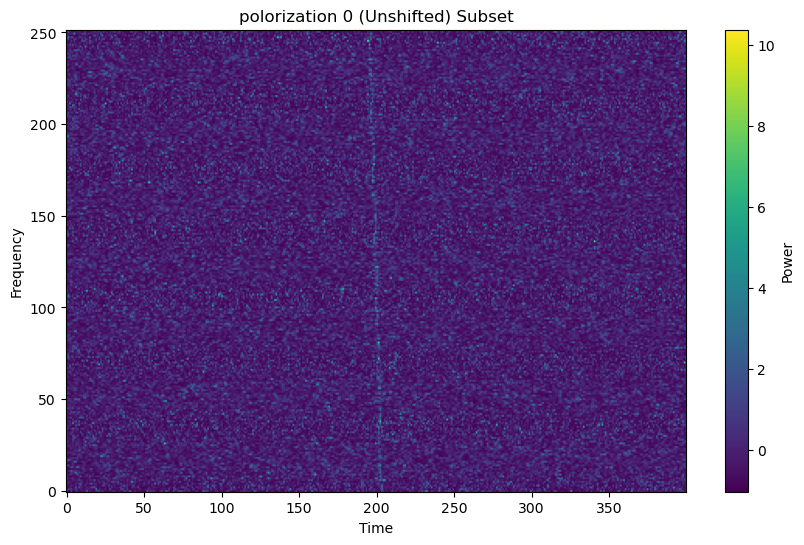

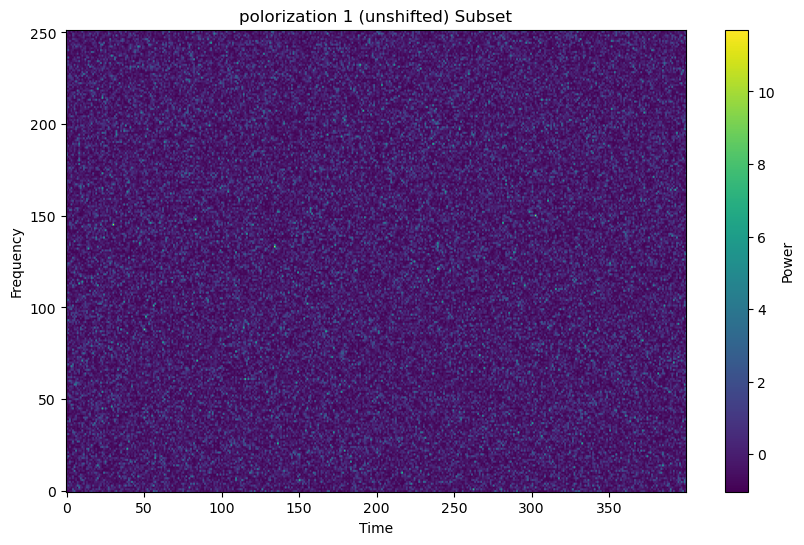

In [11]:
# For the original data
data = np.fromfile('/data/seti/epss179S25/nathan16/c006p0_aligned.bin', dtype=np.float32)
data = data.reshape(252,3145728)

power_sum = np.sum(data, axis=0)
max_idx = np.argmax(power_sum)
print("Max power at frequency bin:", max_idx)

window_size = 400
half_window = window_size // 2

start_idx = max(0, max_idx - half_window)
end_idx = min(data.shape[1], max_idx + half_window)

print("start_idx:", start_idx)
print("end_idx:", end_idx)
# For the original data
subset_0_aligned = data[:, start_idx:end_idx]

data1 = np.fromfile('/data/seti/epss179S25/nathan16/shared/Voyager1/fftb/c006p1.fftb', dtype=np.float32).reshape(252,3145728)
#data1 = data1.reshape(252,3145728)

# For the original data
subset_1_aligned = data1[:, start_idx:end_idx]
print("subset_1_aligned:", subset_1_aligned)

#------------------------------------------
#fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# polorization 0
# im0 = axs[0].imshow(subset_0_aligned, aspect='auto', origin='lower', cmap='viridis')
# axs[0].set_title('polorization 0 Subset; aligned')
# axs[0].set_xlabel('Frequency Bin')
# axs[0].set_ylabel('Time (Row)')
# plt.colorbar(im0, ax=axs[0])

plt.figure(figsize=(10, 6))
plt.imshow(subset_0_aligned, aspect='auto', origin='lower')
plt.title('polorization 0 (Unshifted) Subset')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Power')
plt.show()


# polorization 1
# im1 = axs[1].imshow(subset_1_aligned, aspect='auto', origin='lower', cmap='viridis')
# axs[1].set_title('polorization 1 Subset, aligned')
# axs[1].set_xlabel('Frequency Bin')
# axs[1].set_ylabel('Time (Row)')
# plt.colorbar(im1, ax=axs[1])

# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(subset_1_aligned, aspect='auto', origin='lower')
plt.title('polorization 1 (unshifted) Subset')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Power')
plt.show()

In [6]:
aligned = np.fromfile('c000p0_aligned.bin', dtype=np.float32)
print("aligned:",aligned)
print("aligned shape:", aligned.shape)
print(aligned[0:10])

aligned: [-0.49059033 -0.61275536 -0.35283962 ... -0.47338066 -0.23313262
 -0.3366154 ]
aligned shape: (792723456,)
[-0.49059033 -0.61275536 -0.35283962 -0.5809657  -0.5373833  -0.58945304
 -0.62895787 -0.28096047 -0.2448482  -0.40065822]
